# Exploratory Data Analyst On Titanic Training Dataset From Kaggle

Here is an exploratory data analyst of the Kaggle training set of the Titanic tragedy.

In [11]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Let's import our datas and take a brief look at what they look like

In [12]:
fname = "titanic.csv"
df = pd.read_csv(fname)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [13]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Let's check out some general informations about our datasTotal

Survivor Ratio



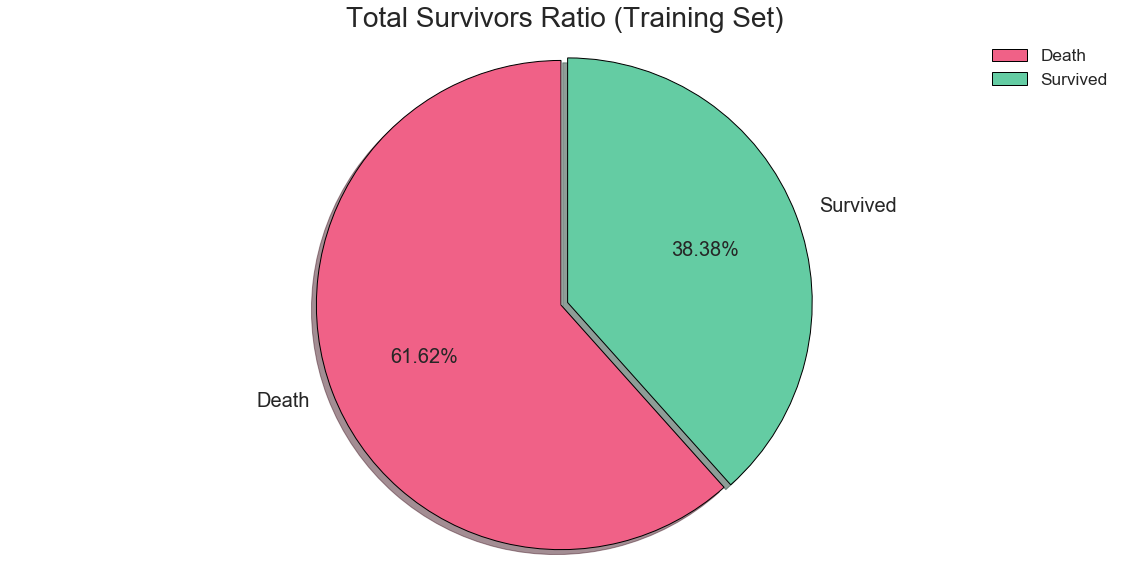

In [15]:
fig, ax = plt.subplots(figsize=(20,10))

survivors = df.Survived.value_counts()

colors=["#F62459", "#26C281"]
survivorLabels = ["Death", "Survived"]

ax.pie(survivors, autopct= "%.2f%%", colors=["#f06187", "#64cca3"], textprops={"fontsize":20}, labels=survivorLabels,\
       startangle=90, wedgeprops = { 'linewidth' : 1 , 'edgecolor' : "k"}, explode=[0, 0.029], shadow=True)

ax.legend(fontsize="xx-large")

plt.title("Total Survivors Ratio (Training Set)", fontdict={"fontsize":28})

ax.axis("equal")

plt.show()

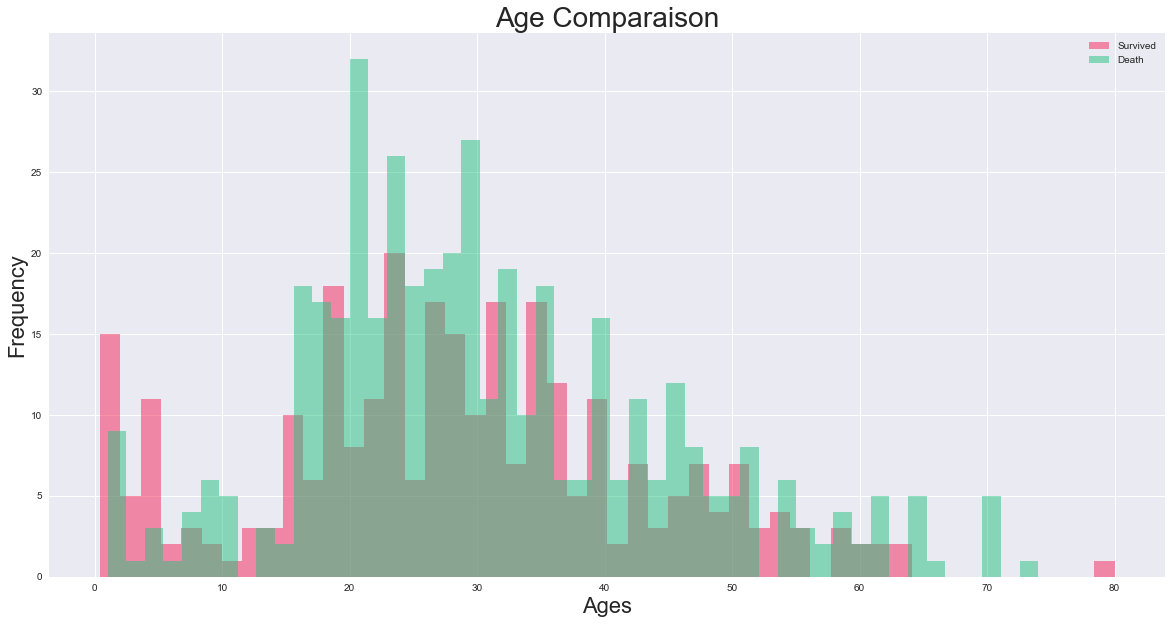

In [16]:
# Create three subplot inside a big rectangle figure
fig, ax = plt.subplots(figsize=(20,10))

# df[df.Age.isnull()]
# Create a dataframe for the age value to not consider the ones who have NaN as age (177 passengers)
age_df = df[df.Age.isnull() == False]
# age_df.info()

ax1 = age_df[age_df.Survived == 1].Age.plot(kind='hist', bins=50, color=colors[0], alpha=0.5, label="Survived")
ax2 = age_df[age_df.Survived == 0].Age.plot(kind='hist', bins=50, color=colors[1], alpha=0.5, label="Death")

plt.title("Age Comparaison", fontdict={"fontsize":28})

ax1.set_xlabel("Ages", fontsize=22)
ax1.set_ylabel("Frequency", fontsize=22)

ax.legend()

plt.show()

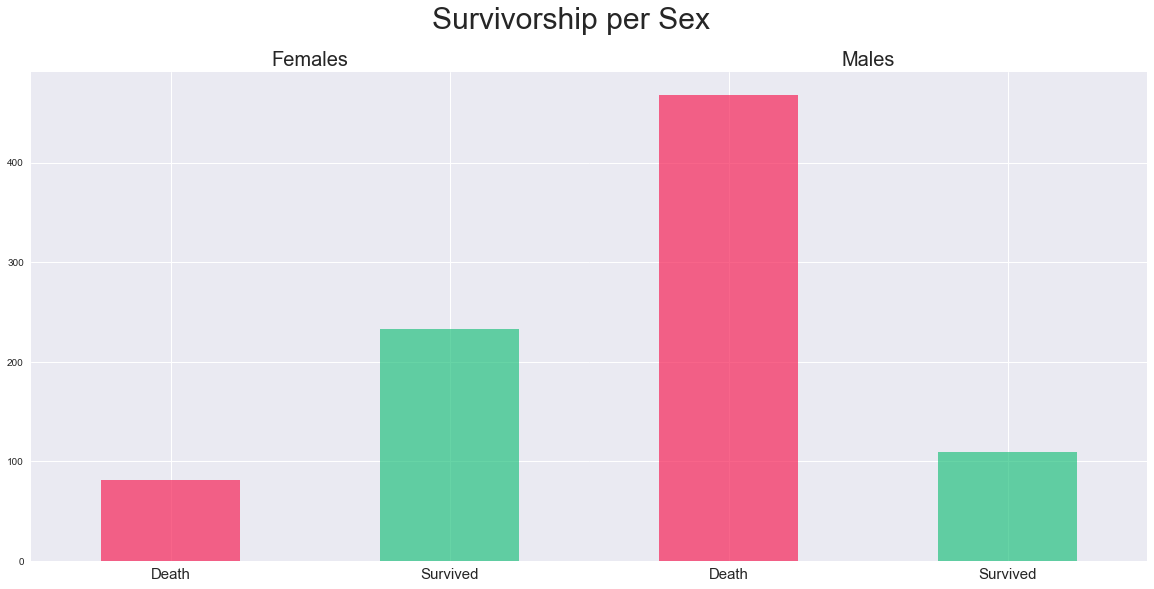

In [17]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(20,9))

ax1 = df[df.Sex=="female"].Survived.value_counts()[::-1].plot(kind="bar", ax=ax[0], color=colors, title="Females", alpha=0.7)
ax2 = df[df.Sex=="male"].Survived.value_counts().plot(kind="bar",  ax=ax[1], color=colors, title="Males", alpha=0.7)

# Put some bigger title
ax[0].title.set_size(20)
ax[1].title.set_size(20)

ax1.set_xticklabels(survivorLabels, rotation=0, fontsize=15)
ax2.set_xticklabels(survivorLabels, rotation=0, fontsize=15)

plt.subplots_adjust(wspace=0)

plt.suptitle('Survivorship per Sex', fontsize=30)

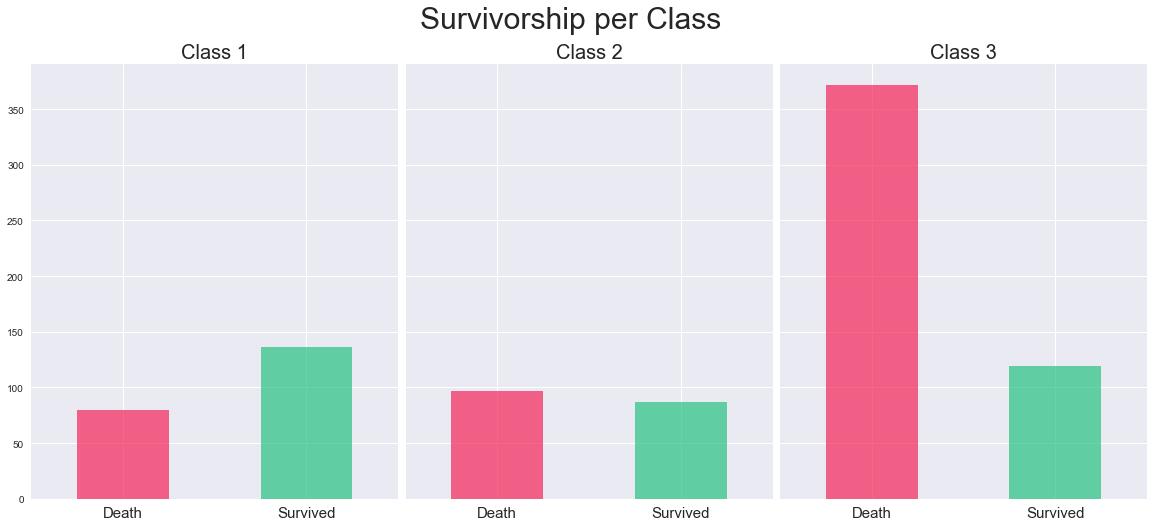

In [18]:
# Create three subplot inside a big rectangle figure
fig, ax = plt.subplots(1,3, sharey=True, figsize=(20,8))

# Compare the survive ratio per class
ax1 = df[(df.Pclass ==1)].Survived.value_counts()[::-1].plot(kind="bar",  ax=ax[0], color=colors, title="Class 1", alpha=0.7)
ax2 = df[(df.Pclass ==2)].Survived.value_counts().plot(kind="bar",  ax=ax[1], color=colors, title="Class 2", alpha=0.7)
ax3 = df[(df.Pclass ==3)].Survived.value_counts().plot(kind="bar",  ax=ax[2], color=colors, title="Class 3", alpha=0.7)


ax1.set_xticklabels(survivorLabels, rotation=0, fontsize=15)
ax2.set_xticklabels(survivorLabels, rotation=0, fontsize=15)
ax3.set_xticklabels(survivorLabels, rotation=0, fontsize=15)


# Put some bigger title
ax[0].title.set_size(20)
ax[1].title.set_size(20)
ax[2].title.set_size(20)

plt.subplots_adjust(wspace=0.02)

plt.suptitle('Survivorship per Class', fontsize=30)

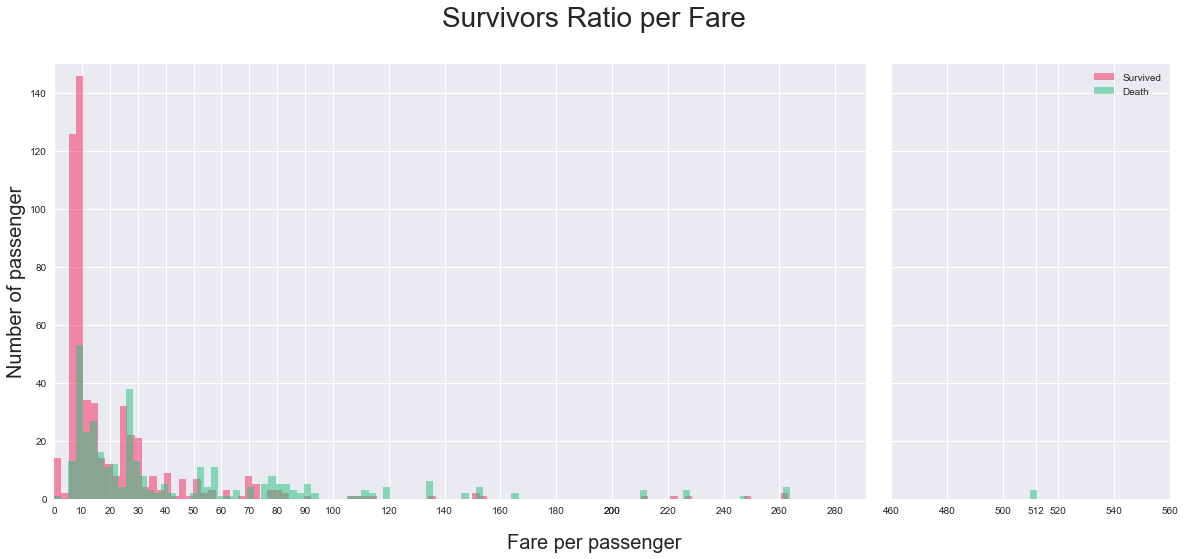

In [28]:
fig, ax = plt.subplots(1, 4, sharey=True, figsize=(20,8))

ax1 = df[df.Survived == False].Fare.plot(kind="hist", bins=100, color=[colors[0]], alpha=0.5, ax=ax[0])
ax1 = df[df.Survived == True].Fare.plot(kind="hist", bins=200, color=[colors[1]], alpha=0.5, ax=ax[0])
ax1.set_xlim(0, 100)
ax1.set_ylim(0,150)
ax1.set_xticks(np.linspace(0,90,10))
ax1.set_ylabel("Number of passenger", fontsize=20)

ax2 = df[df.Survived == False].Fare.plot(kind="hist", bins=100, color=[colors[0]], alpha=0.5, ax=ax[1])
ax2 = df[df.Survived == True].Fare.plot(kind="hist", bins=200, color=[colors[1]], alpha=0.5, ax=ax[1])
ax2.set_xlim(100, 200)
ax2.set_ylim(0,150)
ax2.set_xticks(np.linspace(100,200,6))

ax3 = df[df.Survived == False].Fare.plot(kind="hist", bins=100, color=[colors[0]], alpha=0.5, ax=ax[2])
ax3 = df[df.Survived == True].Fare.plot(kind="hist", bins=200, color=[colors[1]], alpha=0.5, ax=ax[2])
ax3.set_xlim(200, 300)
ax3.set_ylim(0,150)
ax3.set_xticks([200,220,240,260,280,300])

ax3.plot([1, 1], [0, 1], color='w', lw=50, transform=ax3.transAxes, clip_on=False)

ax4 = df[df.Survived == False].Fare.plot(kind="hist", bins=124, color=[colors[0]], label="Survived", alpha=0.5, ax=ax[3])
ax4 = df[df.Survived == True].Fare.plot(kind="hist", bins=200, color=[colors[1]], label="Death", alpha=0.5, ax=ax[3])
ax4.set_xlim(460, 560)
ax4.set_ylim(0,150)
maxFareRange = np.sort(np.append(np.linspace(460,560, 6), [int(max(df.Fare))]))
ax4.set_xticks(maxFareRange)
ax4.legend()


fig.text(0.5, 0.04, 'Fare per passenger', ha='center', fontsize=20)

plt.subplots_adjust(wspace=0)

plt.suptitle('Survivors Ratio per Fare', fontsize=28)

plt.show()

[]

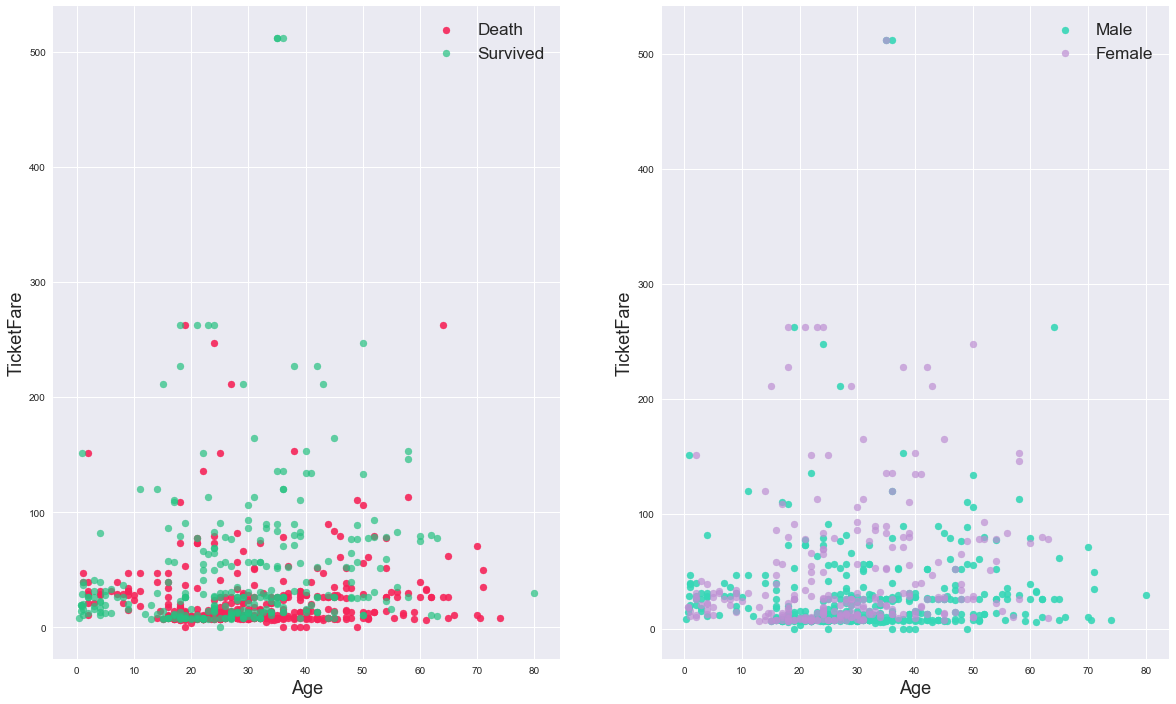

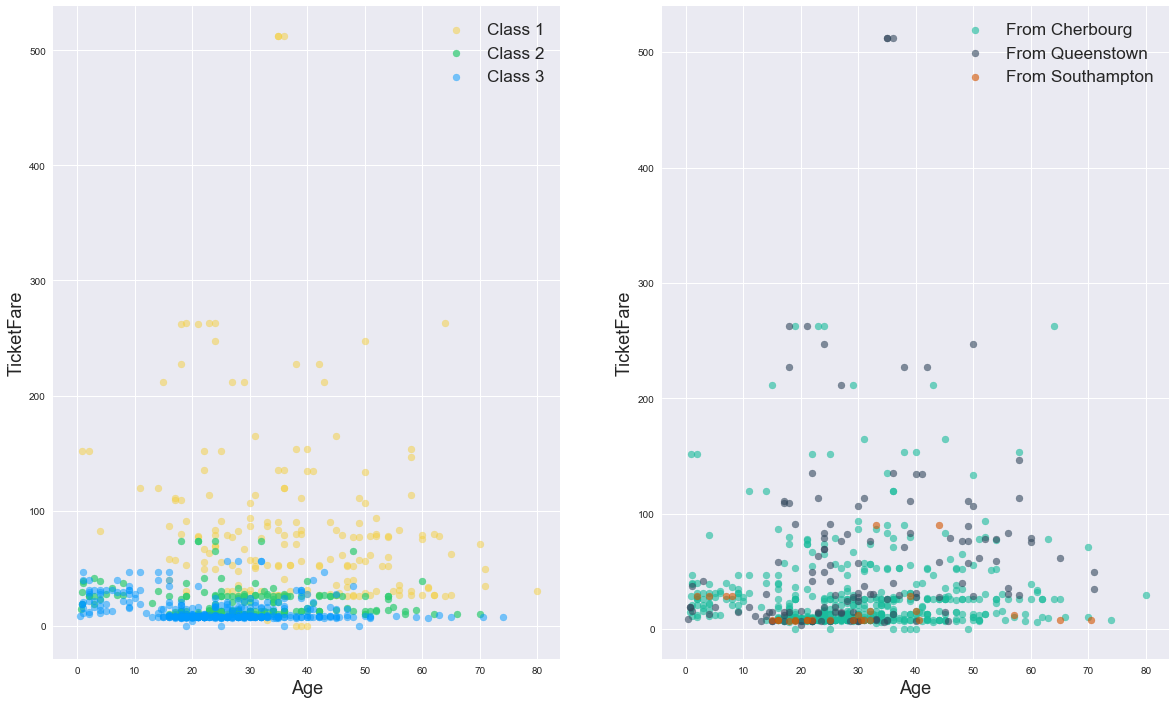

In [22]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(20,12))

classColors = ["#F4D03F", "#2ecc71", "#0099FF"]

plt.subplot(1, 2, 1)
ax1 = plt.scatter(df[df.Survived == False].Age, df[df.Survived == False].Fare, color=colors[0], alpha=0.9, label="Death")
ax1 = plt.scatter(df[df.Survived == True].Age, df[df.Survived == True].Fare, color=colors[1], alpha=0.7, label="Survived")
plt.xlabel("Age", fontsize=18)
plt.ylabel("TicketFare", fontsize=18)
plt.legend(fontsize="xx-large")

plt.subplot(1, 2, 2)

ax2 = plt.scatter(df[df.Sex == "male"].Age, df[df.Sex == "male"].Fare, color="#36D7B7", alpha=0.9, label="Male")
ax2 = plt.scatter(df[df.Sex == "female"].Age, df[df.Sex == "female"].Fare, color="#BE90D4", alpha=0.7, label="Female")
plt.xlabel("Age", fontsize=18)
plt.ylabel("TicketFare", fontsize=18)
plt.legend(fontsize="xx-large")


f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(20,12))

plt.subplot(1, 2, 1)
ax1 = plt.scatter(df[df.Pclass == 1].Age, df[df.Pclass == 1].Fare, color=classColors[0], alpha=0.5, label="Class 1")
ax1 = plt.scatter(df[df.Pclass == 2].Age, df[df.Pclass == 2].Fare, color=classColors[1], alpha=0.7, label="Class 2")
ax1 = plt.scatter(df[df.Pclass == 3].Age, df[df.Pclass == 3].Fare, color=classColors[2], alpha=0.5, label="Class 3")
plt.xlabel("Age", fontsize=18)
plt.ylabel("TicketFare", fontsize=18)
plt.legend(fontsize="xx-large")

plt.subplot(1, 2, 2)

ax2 = plt.scatter(df[df.Embarked == "S"].Age, df[df.Embarked == "S"].Fare, color="#1abc9c", alpha=0.6, label="From Cherbourg")
ax2 = plt.scatter(df[df.Embarked == "C"].Age, df[df.Embarked == "C"].Fare, color="#34495e", alpha=0.6, label="From Queenstown")
ax2 = plt.scatter(df[df.Embarked == "Q"].Age, df[df.Embarked == "Q"].Fare, color="#d35400", alpha=0.6, label="From Southampton")
plt.xlabel("Age", fontsize=18)
plt.ylabel("TicketFare", fontsize=18)
plt.legend(fontsize="xx-large")

plt.plot()

[]

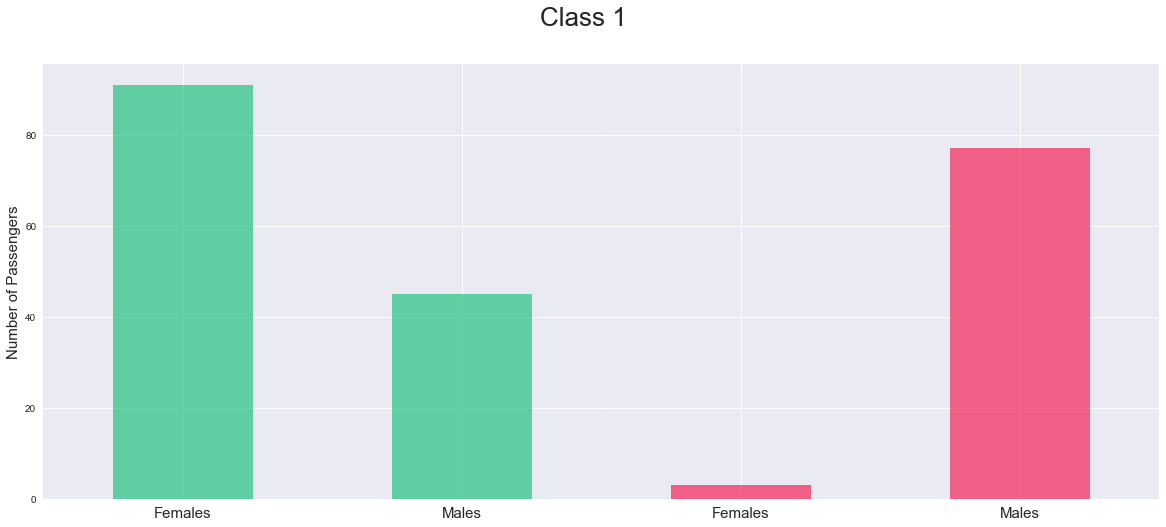

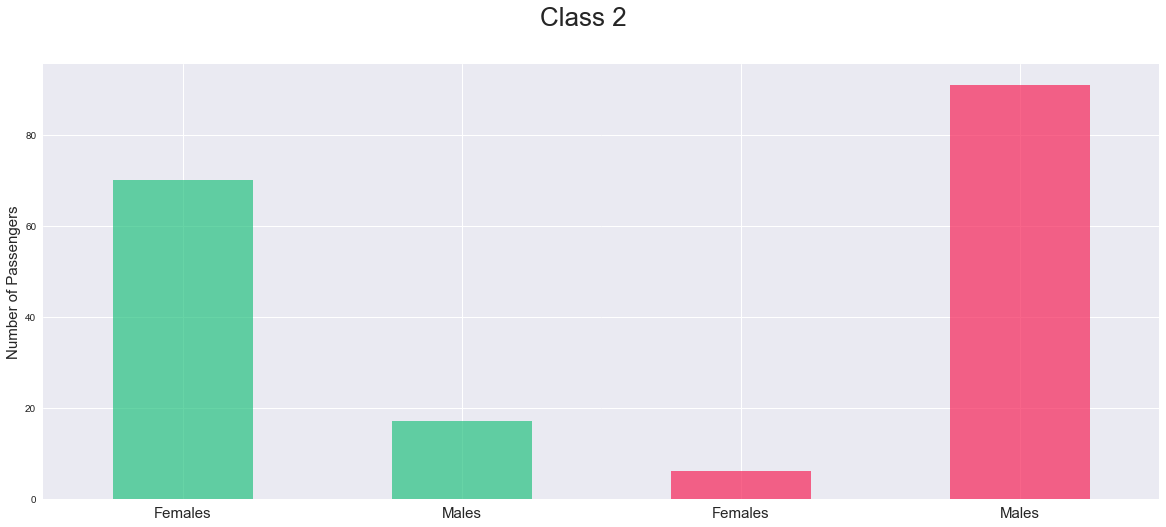

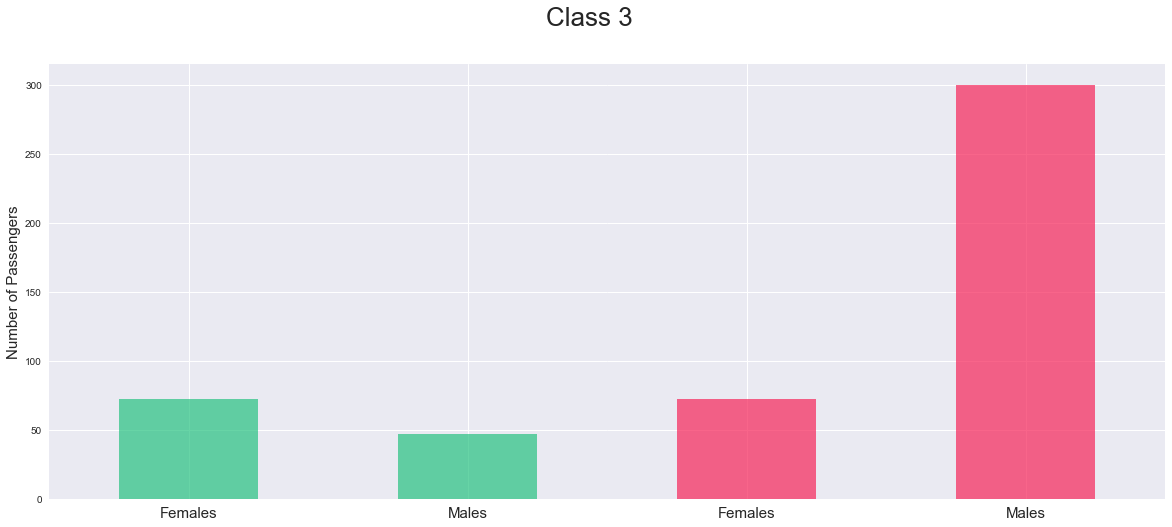

In [26]:
sexLabels = ["Females", "Males"]

# Class 1
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(20,8))

ax1 = df[(df.Pclass == 1) & (df.Survived == 1)].Sex.value_counts().plot(kind="bar", ax=ax[0], color=colors[1], alpha=0.7)
ax2 = df[(df.Pclass == 1) & (df.Survived == 0)].Sex.value_counts()[::-1].plot(kind="bar", ax=ax[1], color=colors[0], alpha=0.7)
ax1.set_xticklabels(sexLabels, rotation=0, fontsize=15)
ax2.set_xticklabels(sexLabels, rotation=0, fontsize=15)
ax1.set_ylabel("Number of Passengers", fontsize=15)

plt.suptitle('Class 1', fontsize=26)
plt.subplots_adjust(wspace=0)


# Class 2
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(20,8))

ax3 = df[(df.Pclass == 2) & (df.Survived == 1)].Sex.value_counts().plot(kind="bar", ax=ax[0], color=colors[1], alpha=0.7)
ax4 = df[(df.Pclass == 2) & (df.Survived == 0)].Sex.value_counts()[::-1].plot(kind="bar", ax=ax[1], color=colors[0], alpha=0.7)
ax3.set_xticklabels(sexLabels, rotation=0, fontsize=15)
ax4.set_xticklabels(sexLabels, rotation=0, fontsize=15)
ax3.set_ylabel("Number of Passengers", fontsize=15)
plt.suptitle('Class 2', fontsize=26)
plt.subplots_adjust(wspace=0)

# Class 3
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(20,8))

ax5 = df[(df.Pclass == 3) & (df.Survived == 1)].Sex.value_counts().plot(kind="bar", ax=ax[0], color=colors[1], alpha=0.7)
ax6 = df[(df.Pclass == 3) & (df.Survived == 0)].Sex.value_counts()[::-1].plot(kind="bar", ax=ax[1], color=colors[0], alpha=0.7)
ax5.set_xticklabels(sexLabels, rotation=0, fontsize=15)
ax6.set_xticklabels(sexLabels, rotation=0, fontsize=15)
ax5.set_ylabel("Number of Passengers", fontsize=15)
plt.suptitle('Class 3', fontsize=26)
plt.subplots_adjust(wspace=0)


plt.plot()

[]

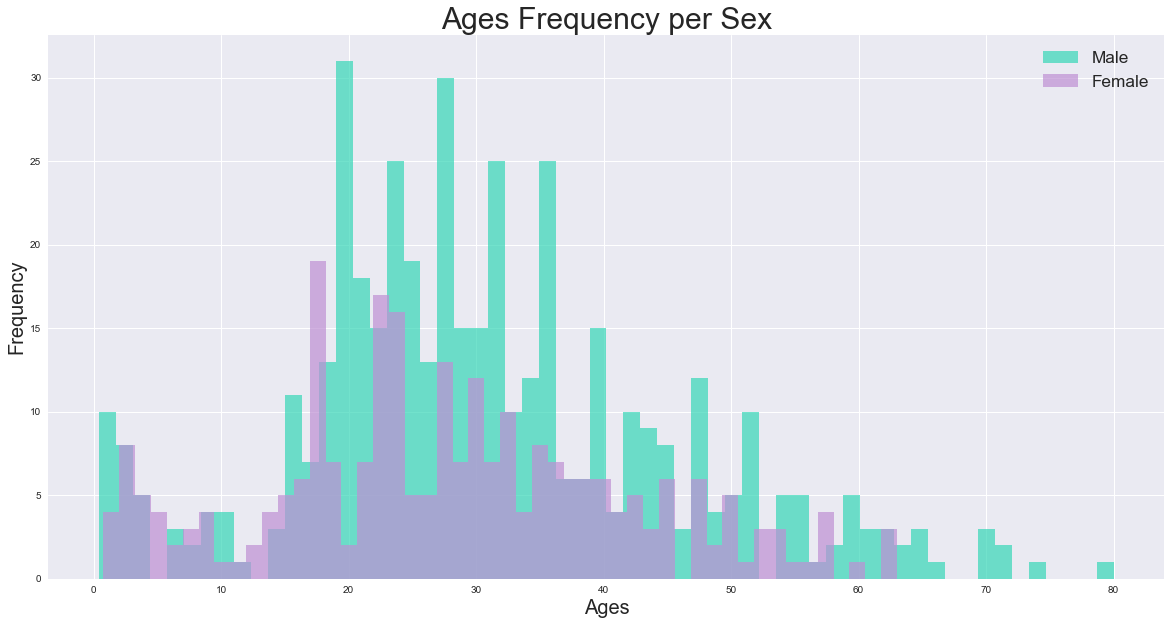

In [23]:
# Drop the NaN values (177 on 892) for this next age plot
ageDropNa_df = df.Age.dropna()

fig, ax = plt.subplots(figsize=(20,10))

ax1 = df[df.Sex == "male"].Age.plot(kind="hist", bins=60, color="#36D7B7", alpha=0.7, label="Males")

ax1 = df[df.Sex == "female"].Age.plot(kind="hist", bins=50, color="#BE90D4", alpha=0.7, label="Females")

ax.set_title("Ages Frequency per Sex", fontsize=30)
ax.set_xlabel("Ages", fontsize=20)
ax.set_ylabel("Frequency", fontsize=20)

ax.legend(fontsize="xx-large")

plt.plot()